In [1]:
# ===============================
# Data Handling
# ===============================
import pandas as pd
import numpy as np
from scipy import stats

# ===============================
# Data Visualization
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ===============================
# Data Preprocessing
# ===============================
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
)
from sklearn.impute import SimpleImputer, KNNImputer

# Import Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# ===============================
# Machine Learning
# ===============================
from sklearn.model_selection import (
    train_test_split, GridSearchCV, cross_val_score
)

# ===============================
# Classification Models
# ===============================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, RandomForestRegressor
)

# ===============================
# Pipeline
# ===============================
from sklearn.pipeline import Pipeline

# ===============================
# Metrics
# ===============================
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_absolute_error, r2_score
)

# ===============================
# Ignore Warnings
# ===============================
import warnings
warnings.filterwarnings('ignore')

print("All necessary libraries have been successfully imported!")

All necessary libraries have been successfully imported!


In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/arjun/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#eda

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Convert 'TotalCharges' to a numeric data type (if needed)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Drop the 'customerID' column (corrected case)
df.drop('customerID', axis=1, inplace=True)

In [9]:
df.describe().T #summary dataset

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [11]:
#apply loop check unique value without int or float in dataset 
for col in df.columns:
    if df[col].dtype !='int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
#check missing values
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

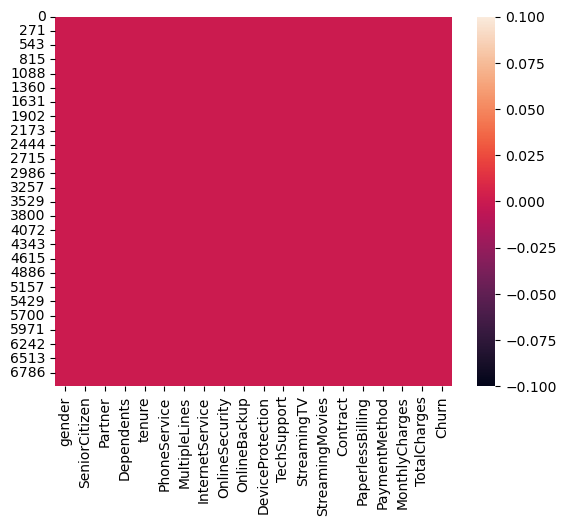

In [15]:
#heatmap for missing value
sns.heatmap(df.isnull())

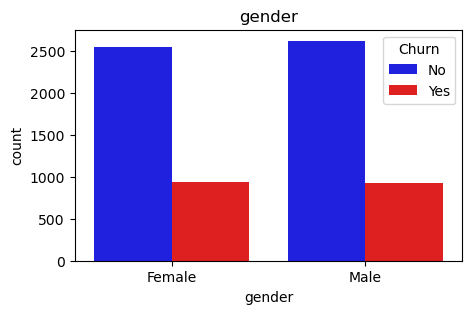

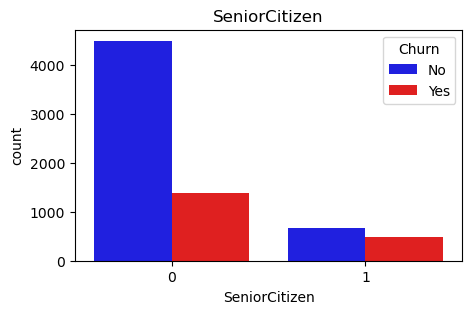

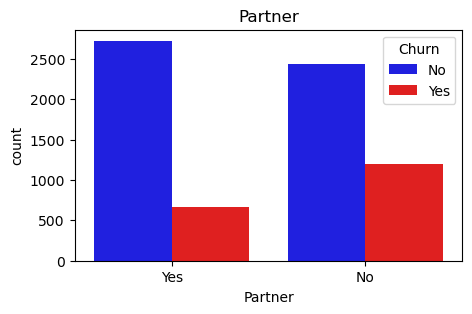

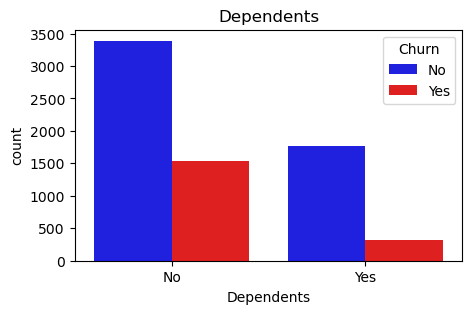

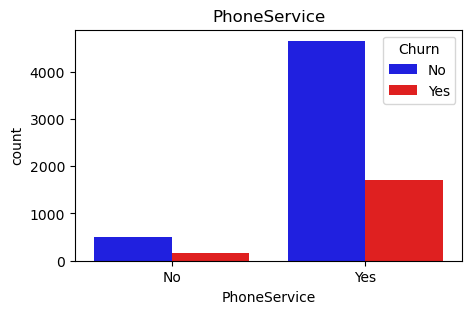

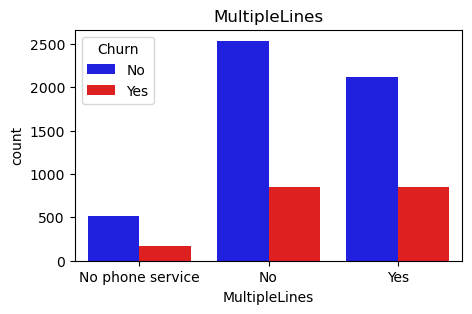

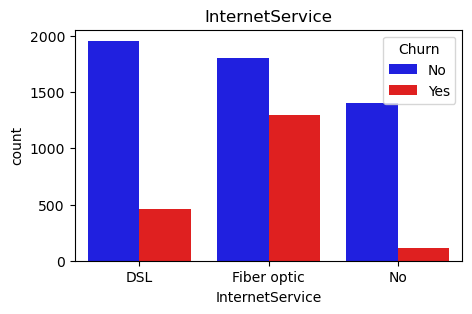

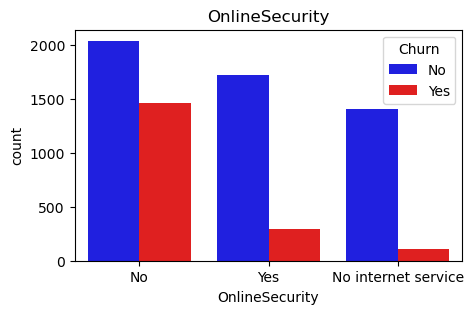

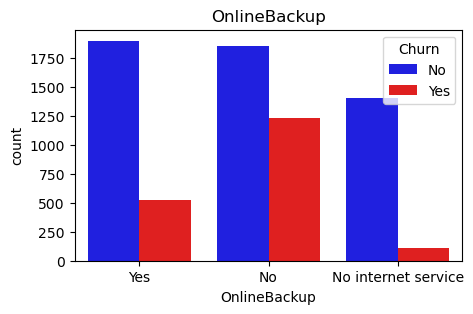

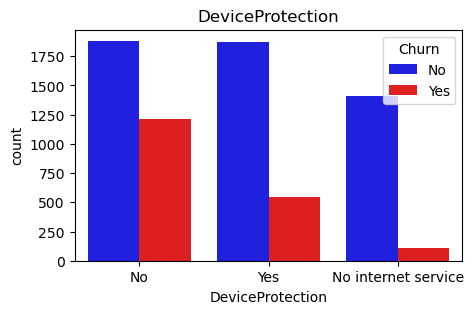

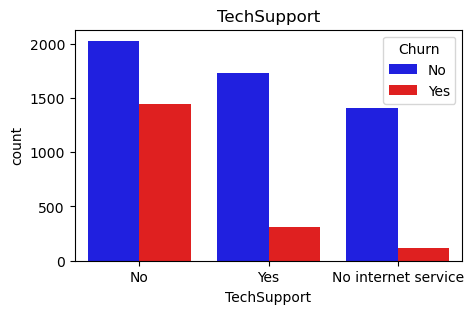

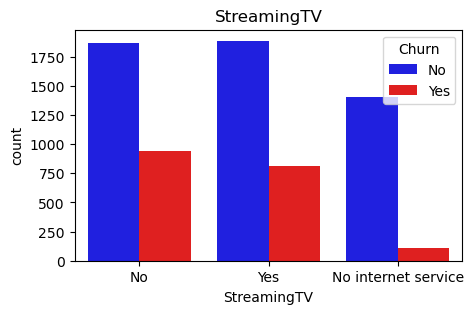

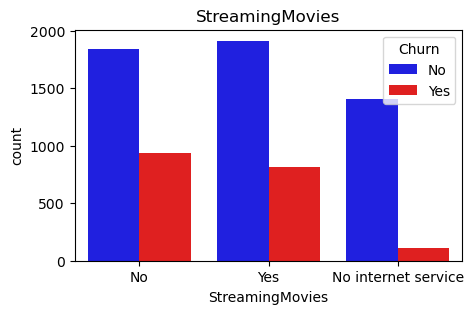

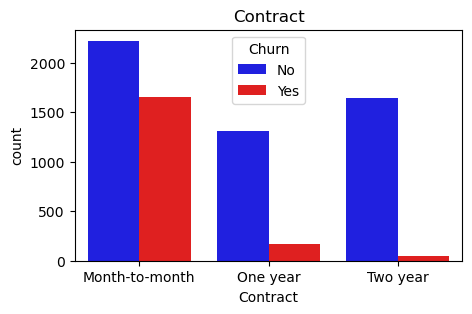

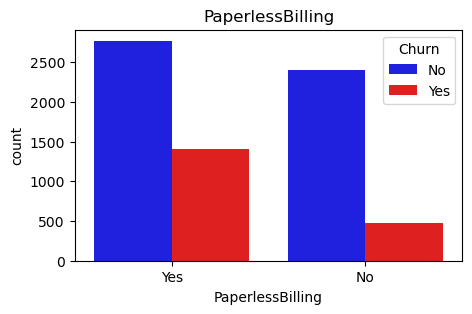

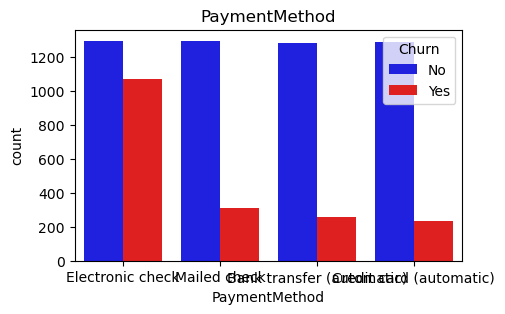

In [17]:
#define colors for yes and no 
colors = {'Yes':'red','No':'blue'}

#add missing keys 0 and 1 in the palette
palette = {0:'blue',1:'red'}

for i,predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges','tenure'])):
    plt.figure(i, figsize= (5,3))
    sns.countplot(data=df, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()

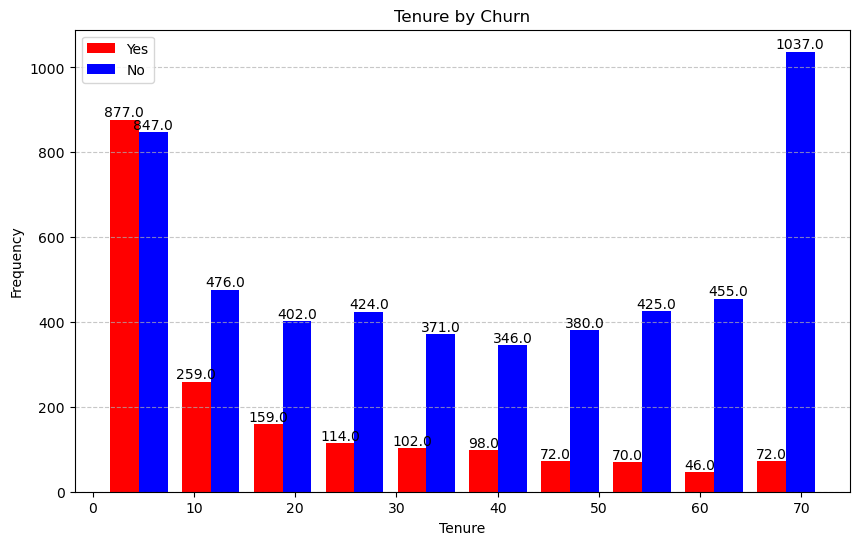

In [19]:
#numerical data
#make plot for tenure
churned  =df[df['Churn'] =='Yes']
not_churned =df[df['Churn'] =='No']

#ploting
plt.figure(figsize=(10,6))
plt.hist([churned['tenure'],not_churned['tenure']],bins=10, color=['red','blue'],label=['Yes','No'])
plt.title('Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
#add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x()+ rect.get_width()/2, height, height, ha='center', va='bottom')

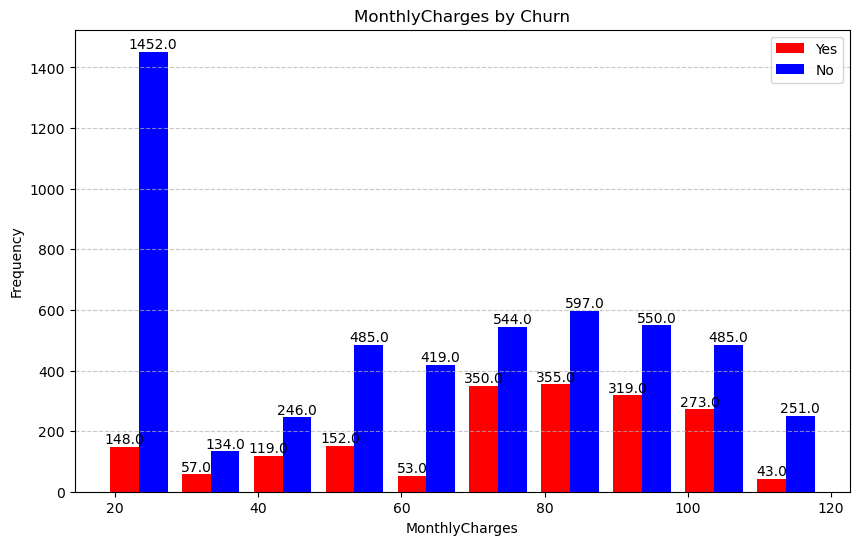

In [21]:
#make plot for montlycharges
churned= df[df['Churn'] =='Yes']
not_churned = df[df['Churn']=='No']
#plotting
plt.figure(figsize=(10,6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']],bins=10,color=['red','blue'],label=['Yes','No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

#add text on top of bars
for rect in plt.gca().patches:
    height=rect.get_height()
    plt.gca().text(rect.get_x()+rect.get_width()/2, height, height, ha='center', va='bottom')

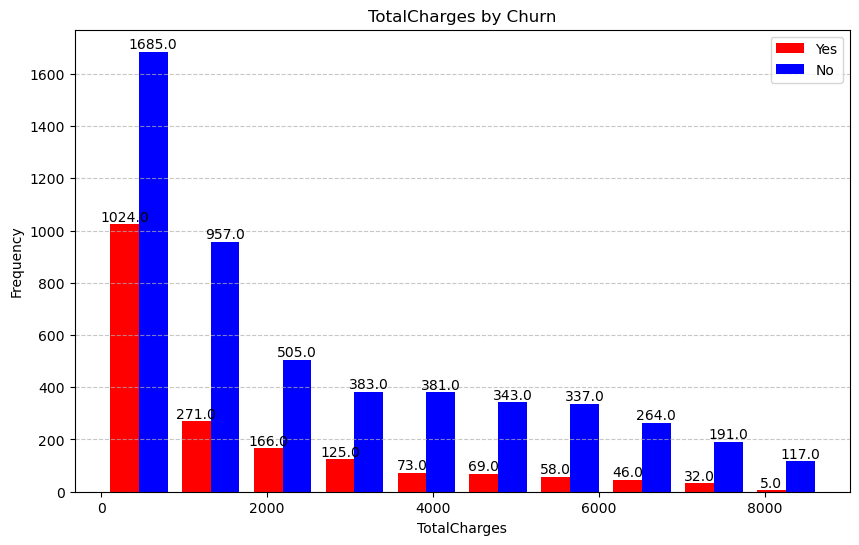

In [23]:
#make plot for montlycharges
churned= df[df['Churn'] =='Yes']
not_churned = df[df['Churn']=='No']
#plotting
plt.figure(figsize=(10,6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']],bins=10,color=['red','blue'],label=['Yes','No'])
plt.title('TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

#add text on top of bars
for rect in plt.gca().patches:
    height=rect.get_height()
    plt.gca().text(rect.get_x()+rect.get_width()/2, height, height, ha='center', va='bottom')

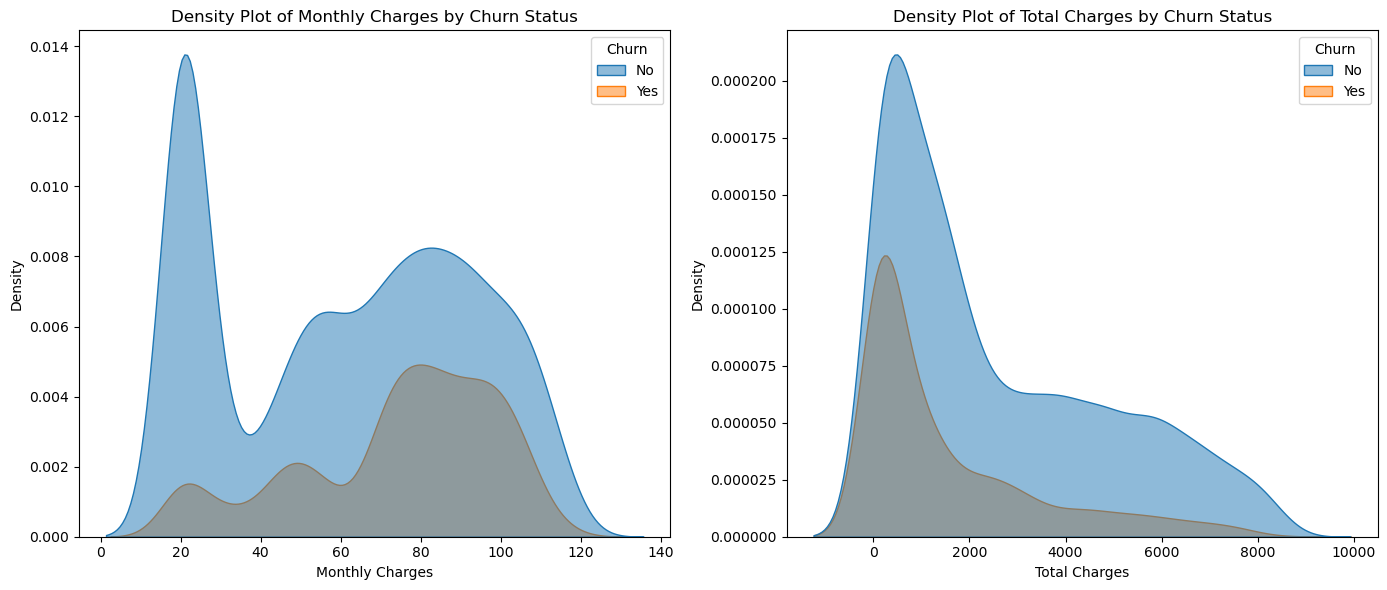

In [25]:
#create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Monthly Charges
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('Density Plot of Monthly Charges by Churn Status')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')

# Plot for Total Charges
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('Density Plot of Total Charges by Churn Status')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [27]:
#customer with lower monthly charges are more likely to churn

#machine learning
#encode data by hot encoder
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder with the updated argument
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [29]:
df.drop('Churn_No', axis=1, inplace=True)

In [31]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [33]:
# rename churn_yes to churn
df.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)

In [35]:
# split data into X and y
X = df.drop('Churn', axis=1)
y = df['Churn']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [39]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
      
        grid_search = GridSearchCV(pipeline, param_grid, cv=2, n_jobs=1)
        grid_search.fit(X_train, y_train)

        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", round(best_accuracy, 2), "%")


Model: Random Forest
Test Accuracy: 0.819 %

Model: Gradient Boosting
Test Accuracy: 0.822 %

Model: Support Vector Machine
Test Accuracy: 0.745 %

Model: Logistic Regression
Test Accuracy: 0.75 %



  File "C:\Users\arjun\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\arjun\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\arjun\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\arjun\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Model: K-Nearest Neighbors
Test Accuracy: 0.789 %

Model: Decision Tree
Test Accuracy: 0.781 %

Model: Ada Boost
Test Accuracy: 0.813 %

Model: XG Boost
Test Accuracy: 0.826 %

Model: Naive Bayes
Test Accuracy: 0.696 %

Best Model:
Test Accuracy: 0.8258706467661692
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                       

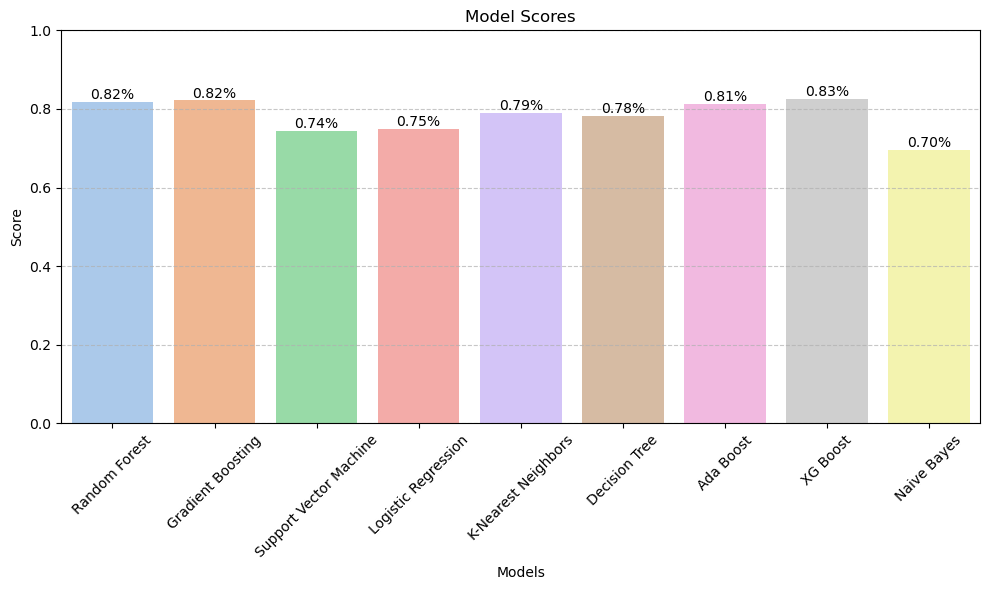

In [41]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [43]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint

# UpSampling
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6), 
         'learning_rate': uniform(0.01, 0.2),  
         'n_estimators': randint(100, 300),  
         'subsample': uniform(0.8, 0.2)}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(Xr_train, yr_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate accuracy score
    accuracy = accuracy_score(yr_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", round(best_accuracy, 2), "%")

Model: Random Forest
Test Accuracy: 0.957 %

Model: Gradient Boosting
Test Accuracy: 0.95 %

Model: Support Vector Machine
Test Accuracy: 0.985 %

Model: Logistic Regression
Test Accuracy: 0.915 %

Model: K-Nearest Neighbors
Test Accuracy: 0.988 %

Model: Decision Tree
Test Accuracy: 0.933 %

Model: Ada Boost
Test Accuracy: 0.938 %

Model: XG Boost
Test Accuracy: 0.958 %

Model: Naive Bayes
Test Accuracy: 0.875 %

Best Model:
Test Accuracy: 0.9880341880341881
Model Pipeline: KNeighborsClassifier(n_neighbors=3, weights='distance') with accuracy 0.99 %


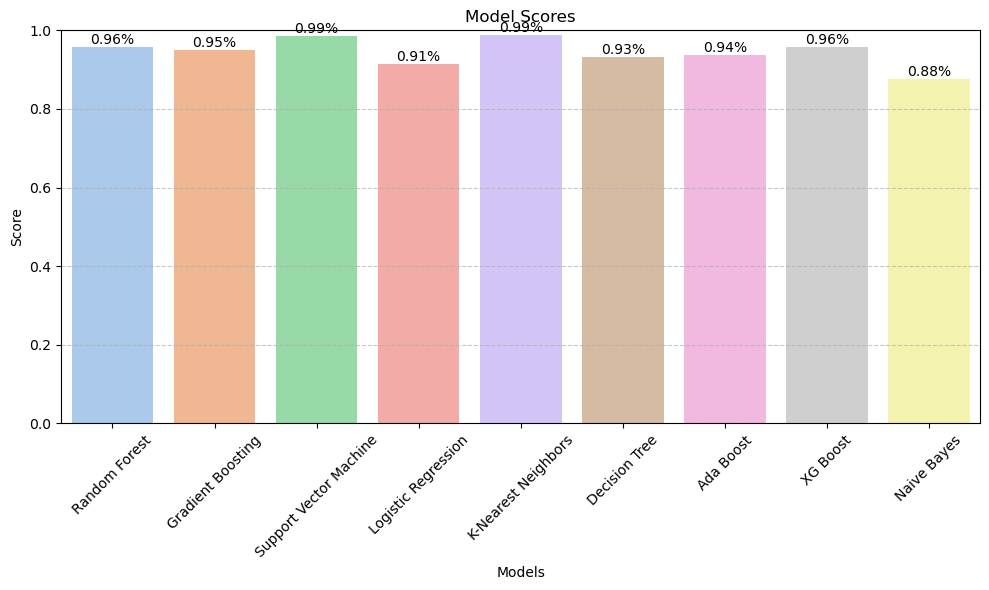

In [45]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

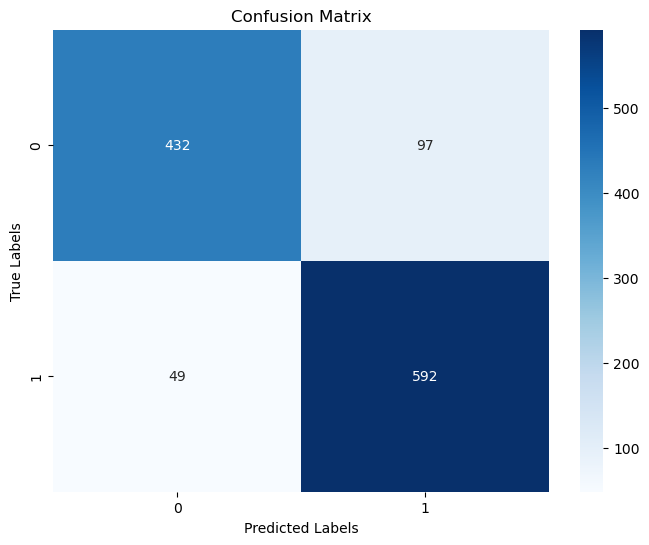

In [47]:

# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()